## Problem 5 - Sampling and aliasing

()


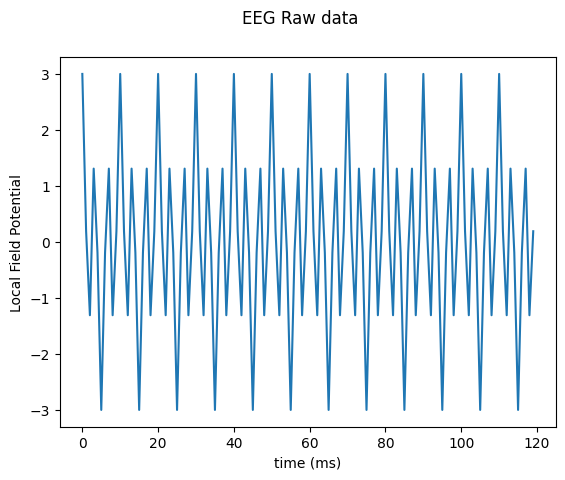

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.fftpack import fft,fftfreq 
#Load and visualize given data 
load_data = loadmat('myMeasurements.mat')
eeg_data = load_data['sig'][0]
eeg_time = load_data['time'][0]
fig,axs = plt.subplots()
fig.suptitle('EEG Raw data')
axs.plot(eeg_time,eeg_data)
plt.xlabel("time (ms)")
plt.ylabel("Local Field Potential")

print(np.shape(load_data))

Text(0, 0.5, 'Local Field Potential')

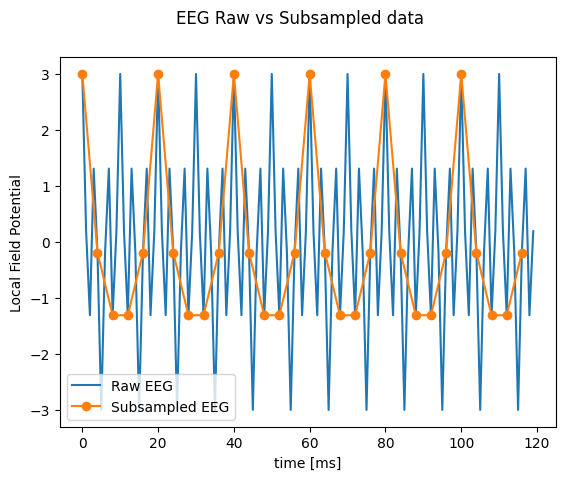

In [19]:
## a) Subsample the data every fourth sample
sub_eeg = eeg_data[0::4]
sub_time = eeg_time[0::4]
# Visualize downsampled data
fig,axs = plt.subplots()
fig.suptitle('EEG Raw vs Subsampled data')
axs.plot(eeg_time,eeg_data,label='Raw EEG')
axs.plot(sub_time,sub_eeg, '-o',label= 'Subsampled EEG')
axs.legend()
plt.xlabel("time [ms]")
plt.ylabel("Local Field Potential")


We can see that the subsampled signal doesn't capture the behaviour of the full signal. Additionally one can also analyze that the subsampling operation is not shift invariant, because if you shift your signal in time by one sample you end un getting a totally different signal. This operation isn't linear either, one can argu that its serve the scalability factor of linear systems but not the distributive factor, as you are loosing information when you subsample is not the same to subsample two inputs and then sum them, than summing them and the subsampling, you would get two different signals. 

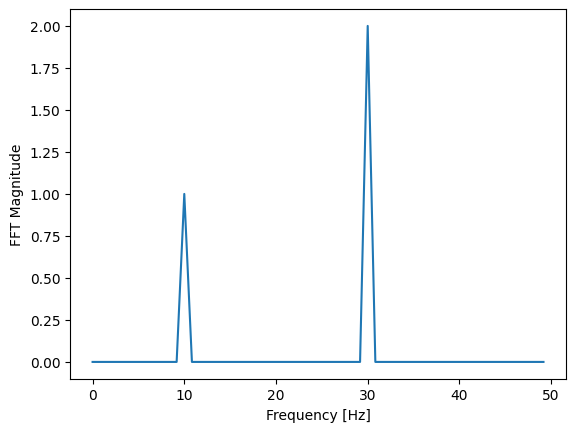

In [18]:
# b) Fourier abs
# Sample spacing
# Number of samplepoints
N = len(eeg_data)
T = 1.0 / 100.0 # Period = 1/freq
x = np.linspace(0.0, N*T, N, endpoint = False)
yf = fft(eeg_data)
xf = fftfreq(N, T)[:N//2]

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel('Frequency [Hz]')
plt.ylabel('FFT Magnitude')
plt.grid(visible=None)
plt.grid()
plt.show()

We can see that the beta band is the strongest band of the signal, as it captures most of the power of the signal.

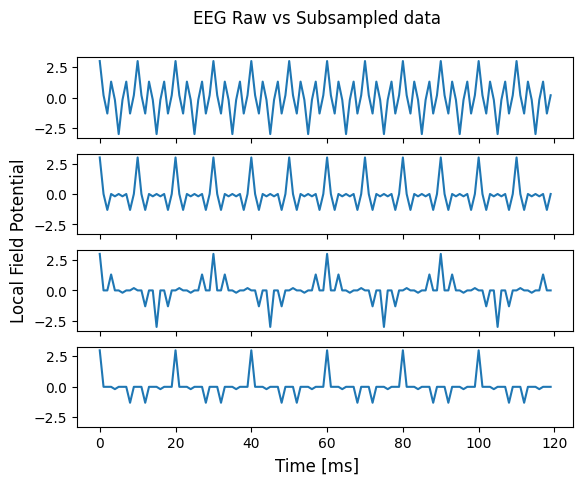

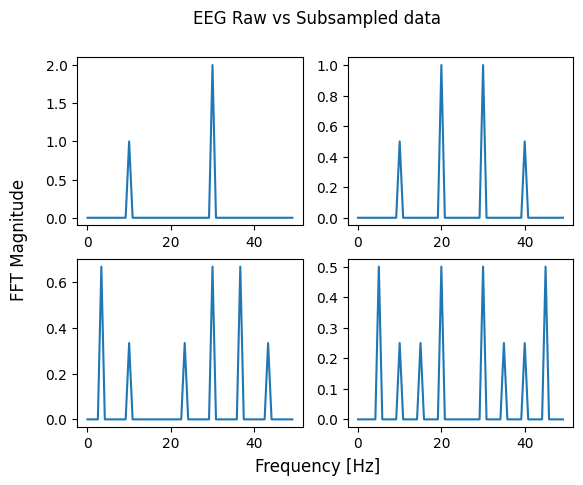

In [15]:
## c) 
sub2_eeg = np.zeros((1,120))[0]
sub2_eeg[::2] = eeg_data[::2]
sub3_eeg = np.zeros((1,120))[0]
sub3_eeg[::3] = eeg_data[::3]
sub4_eeg = np.zeros((1,120))[0]
sub4_eeg[::4] = eeg_data[::4]

# Calculate the Fourier transform of downsample data
sub2_fft = fft(sub2_eeg)
sub3_fft = fft(sub3_eeg)
sub4_fft = fft(sub4_eeg)

# Visualize downsample-upsample signals
fig,axs = plt.subplots(4,1, sharex=True, sharey=True)
fig.suptitle('EEG Raw vs Subsampled data')
fig.supxlabel('Time [ms]')
fig.supylabel('Local Field Potential')
axs[0].plot(eeg_time, eeg_data,label='100 Hz')
axs[1].plot(eeg_time, sub2_eeg,label='50 Hz')
axs[2].plot(eeg_time, sub3_eeg,label= '33 Hz')
axs[3].plot(eeg_time, sub4_eeg,label= '25 Hz')
# axs[3].set_xlabel('Frequency [Hz]')


# Visualize the downsampling effect
fig1,axs1 = plt.subplots(2,2)
fig1.suptitle('EEG Raw vs Subsampled data')
fig1.supxlabel('Frequency [Hz]')
fig1.supylabel('FFT Magnitude')
axs1[0,0].plot(xf, 2.0/N * np.abs(yf[0:N//2]),label='100 Hz')
axs1[0,1].plot(xf, 2.0/N * np.abs(sub2_fft[0:N//2]),label= '50 Hz')
axs1[1,0].plot(xf, 2.0/N * np.abs(sub3_fft[0:N//2]),label= '33 Hz')
axs1[1,1].plot(xf, 2.0/N * np.abs(sub4_fft[0:N//2]),label= '25 Hz')



After subsampling we can observe that the frequency response varies, this is due to the fact that we are loosing information in the subsampling operation. The power of the signal now has to be distributed among more frequency components, so we get less strong signal on the beta band. This distortion of the signal and the incorporation of new frequency components is called aliasing, and it happens when Nyquist theorem isnt followed. Nyquist theorem states that in order for a signal not to under go aliasing it must be sampled at a frequency of at least doble the maximum frequency of the signal. This maximum frequency would be 30 Hz, so we our sampling rate would have to be at least 60Hz in order not to observe aliasing, but since our subsampling operantion starts at 50 Hz we get this distorion in all of our subsampled signals. 